# LeNet
LeNet atau LeNet-5 merupakan struktur CNN yang diusulkan oleh Yann LeCun et al. Struktur LeNet termasuk struktur yang sederhana, terdiri dari 2 layer konvolusi, 2 layer pooling, dan 3 Fully connected layer.

Pada tingkat tinggi, LeNet (LeNet-5) terdiri dari dua bagian:

*   Encoder konvolusi yang terdiri dari dua lapisan konvolusi; dan
*   Blok padat yang terdiri dari tiga lapisan yang terhubung penuh

![Data flow in LeNet.](http://d2l.ai/_images/lenet.svg)
Aliran data di LeNet. Input berupa digit tulisan tangan, output probabilitas lebih dari 10 kemungkinan hasil.



In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
#Menggunakan Dataset MNIST
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
rows, cols = 28, 28

In [4]:
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)

In [5]:
input_shape = (rows, cols, 1)

In [6]:
#Melakukan Normalisasi
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
#One-hot encode
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [8]:
def build_lenet(input_shape):
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=6,
                                     kernel_size = (5,5),
                                     strides = (1,1),
                                     activation = 'tanh',
                                     input_shape = input_shape))

    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                               strides = (2,2)))
    model.add(tf.keras.layers.Conv2D(filters = 16,
                                     kernel_size = (5,5),
                                     strides =  (1,1),
                                     activation = 'tanh'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size = (2,2),
                                               strides = (2,2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 120,
                                    activation = 'tanh'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units = 84,
                                      activation = 'tanh'))
    model.add(tf.keras.layers.Dense(units = 10,
                                    activation = 'softmax'))
    model.compile(loss='categorical_crossentropy',
                  optimizer = tf.keras.optimizers.SGD(lr = 0.1,momentum = 0.0,decay = 0.0),
                  metrics = ['accuracy'])
    return model

In [9]:
lenet = build_lenet(input_shape)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [10]:
epochs = 10

In [11]:
history = lenet.fit(x_train, y_train,
                    epochs = epochs,
                    batch_size = 128,
                    verbose = 1)

Epoch 1/10
469/469 [==============================] - 13s 4ms/step - loss: 0.4038 - accuracy: 0.8873
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1607 - accuracy: 0.9523
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.1060 - accuracy: 0.9687
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0812 - accuracy: 0.9760
Epoch 5/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9800
Epoch 6/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0582 - accuracy: 0.9830
Epoch 7/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0514 - accuracy: 0.9846
Epoch 8/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9858
Epoch 9/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0414 - accuracy: 0.9879
Epoch 10/10
469/469 [==============================] - 2s 4ms/step - loss: 0.0382 - accuracy: 0.989

In [12]:
loss, acc = (lenet.evaluate(x_test, y_test))
print('Accuracy: ', acc)

313/313 [==============================] - 2s 4ms/step - loss: 0.0393 - accuracy: 0.9872
Accuracy:  0.9872000217437744


In [13]:
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print('Training Data ', x_train.shape, y_train.shape)

Training Data  (60000, 28, 28) (60000, 10)


In [14]:
x_test = x_test.reshape(x_test.shape[0], 28, 28)
print('Training Data ', x_test.shape, y_test.shape)

Training Data  (10000, 28, 28) (10000, 10)


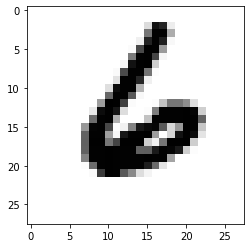

In [15]:
image_index = 8888
plt.imshow(x_test[image_index].reshape(28, 28), cmap= 'Greys')

In [16]:
pred = lenet.predict(x_test[image_index].reshape(1, rows, cols, 1))
print(pred.argmax())

6
